In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ✅ 한글 폰트 경로 설정 (예: 맑은 고딕 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우일 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # 맥북일 경우
# plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스 + 나눔글꼴 설치 시

# ✅ 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 영화 추천 서비스 제작 - 크롤링 기반, 감성분석 모델 이용

In [5]:
#각자 파일 합치기
import pandas as pd
import glob

# 1. 합칠 CSV 파일들 경로 패턴 지정
file_pattern = "megabox_movie_list_with_reviews*.csv"


# 2. glob으로 파일 목록 가져오기
file_list = glob.glob(file_pattern)

# 3. 파일별로 읽어서 리스트에 저장
df_list = [pd.read_csv(file) for file in file_list]

# 4. 하나로 병합
merged_df = pd.concat(df_list, ignore_index=True)

# 5. 중복 제거 (선택 사항)
merged_df.drop_duplicates(inplace=True)

# 6. 저장
output_path = "megabox_movie_list_with_reveiws_merged.csv"
merged_df.to_csv(output_path, index=False, encoding="utf-8-sig")

# 7. 행 개수 출력
print(f"✅ 총 {len(file_list)}개 파일 병합 완료")
print(f"📊 병합된 결과: {merged_df.shape[0]}개 행, {merged_df.shape[1]}개 열")
print(f"💾 저장 위치: {output_path}")


✅ 총 4개 파일 병합 완료
📊 병합된 결과: 201개 행, 11개 열
💾 저장 위치: megabox_movie_list_with_reveiws_merged.csv


## 감성 점수 먼저 계산

In [3]:
#감성 분석 모델 만들어 둔 거 가져오기

import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Tokenizer 로드
with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)

# 2. 모델 로드
model = load_model("best_model.h5")

# 3. 감정 예측 함수 정의
def predict_sentiment_score(text, max_len=100):
    """
    입력된 문장에 대해 긍정 점수(0~100 사이 float) 반환
    """
    # 토큰화 및 시퀀스 변환
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len)

    # 예측
    pred = model.predict(padded, verbose=0)
    positive_score = float(pred[0][0]) * 100  # 긍정 확률을 %로 변환
    return round(positive_score, 2)



In [6]:
#감성 점수 평균으로 계산하기
import pandas as pd 
df = pd.read_csv("megabox_movie_list_with_reveiws_merged.csv")

df["감성점수"] = 0.0

for idx, row in df.iterrows():
    scores = []
    for i in range(1, 6):
        review = row.get(f"리뷰{i}", "")
        if pd.notna(review) and review.strip():
            score = predict_sentiment_score(review)  # <- 점수 반환 방식 함수
            scores.append(score)

    # 평균 점수 저장 (예: 78.3%)
    avg_score = np.mean(scores) if scores else 0.0
    df.at[idx, "감성점수"] = avg_score

    print(f"🎯 [{row['영화제목']}] → 감성 점수: {avg_score:.2f}")

df.to_csv("megabox_movie_list_merged_avg.csv", index=False, encoding="utf-8-sig")
print("\n📁 결과 저장 완료 → megabox_movie_reviews_avg_merged.csv")


🎯 [[ROH 오페라] 세비야의 이발사] → 감성 점수: 56.58
🎯 [찬란한 나의 복수] → 감성 점수: 51.23
🎯 [사랑의 고고학] → 감성 점수: 42.88
🎯 [불멸의 여자] → 감성 점수: 48.55
🎯 [[아카데미] 파벨만스] → 감성 점수: 55.91
🎯 [감각의 제국 감독판] → 감성 점수: 52.50
🎯 [부운] → 감성 점수: 61.02
🎯 [토니 타키타니] → 감성 점수: 35.05
🎯 [[뮤지컬] 안나 카레니나] → 감성 점수: 45.61
🎯 [마리아 칼라스: 세기의 디바] → 감성 점수: 35.81
🎯 [[뮤지컬] 몬테크리스토] → 감성 점수: 45.18
🎯 [피기] → 감성 점수: 40.53
🎯 [65] → 감성 점수: 54.56
🎯 [여덟 번째 감각] → 감성 점수: 38.75
🎯 [장기자랑] → 감성 점수: 46.16
🎯 [존 윅 4] → 감성 점수: 54.96
🎯 [[라이브뷰잉] 노래하는 왕자님 SHINING STAR STAGE-SONG PARADE☆-] → 감성 점수: 50.51
🎯 [드림] → 감성 점수: 67.23
🎯 [곰돌이 푸: 피와 꿀] → 감성 점수: 47.38
🎯 [에어] → 감성 점수: 43.36
🎯 [라이스보이 슬립스] → 감성 점수: 54.67
🎯 [거울 속 외딴 성] → 감성 점수: 46.36
🎯 [보이지 않아] → 감성 점수: 58.97
🎯 [물안에서] → 감성 점수: 42.27
🎯 [[애니 특별전] 러브 라이브! 더 스쿨 아이돌 무비] → 감성 점수: 61.27
🎯 [[애니 특별전] 러브라이브! 선샤인!! 더 스쿨 아이돌 무비 오버 더 레인보우] → 감성 점수: 64.62
🎯 [킬링 로맨스] → 감성 점수: 42.57
🎯 [[클소토크] 마리아 칼라스: 세기의 디바] → 감성 점수: 77.92
🎯 [라스트 필름 쇼] → 감성 점수: 55.50
🎯 [[응원상영] 킹 오브 프리즘 올 스타즈 -프리즘 쇼☆베스트10-] → 감성 점수: 55.40
🎯 [[응원상영] 프로메어+갈로&리오 특별 영상] → 감성 점수

# 데이터 분석! 이란 걸 해야합니다!

In [8]:
import pandas as pd

df = pd.read_csv("megabox_reviews_merged_avg.csv")
# 상영시간 숫자형 변환
df["상영시간_분"] = df["상영시간"].str.extract(r"(\d+)").astype(float)

# 개봉일 날짜형 변환
df["개봉일"] = pd.to_datetime(df["개봉일"], errors="coerce")
df["개봉년도"] = df["개봉일"].dt.year
df["개봉월"] = df["개봉일"].dt.month


In [9]:
genre_sentiment = df.groupby("장르")["감성점수"].mean().sort_values(ascending=False)
print(genre_sentiment)
#장르에 따라서 감성점수 출력했더니 복합 장르가 많음을 확인

장르
애니메이션, 액션                   78.728
뮤지컬, 판타지                    73.184
공포(호러), 드라마, 스릴러            72.186
드라마, 액션, 전쟁                 67.672
SF, 애니메이션, 액션, 어드벤처, 코미디    67.410
                             ...  
공포(호러), 드라마, 범죄             37.468
서부극(웨스턴), 액션                35.242
SF, 드라마, 액션                 28.424
공포(호러), 액션                  27.568
SF, 코미디, 판타지                24.006
Name: 감성점수, Length: 102, dtype: float64


In [10]:
# 장르 분해 → 긴 리스트 만들기
# 복합 장르들을 하나하나 분해해서 중복으로 인정되게 만듦
genre_scores = []

for _, row in df.iterrows():
    genres = [g.strip() for g in str(row["장르"]).split(",")]
    score = row["감성점수"]  # 감성 점수 열 이름에 맞게 수정
    for g in genres:
        genre_scores.append({"장르": g, "감성점수": score})

# 새로운 DataFrame
genre_df = pd.DataFrame(genre_scores)

# 장르별 평균 감성점수 재계산
genre_avg = genre_df.groupby("장르")["감성점수"].mean().sort_values(ascending=False)

# 출력
print(genre_avg)


장르
다큐멘터리       56.299556
공연          56.098426
애니메이션       54.737763
로맨스         53.326750
기타          53.304000
드라마         53.149827
가족영화        51.609000
어드벤처        50.969231
코미디         50.754258
뮤지컬         50.326800
전쟁          50.214889
공포(호러)      49.859795
액션          49.809907
판타지         49.785826
미스터리        49.717697
SF          48.695481
스릴러         48.112536
범죄          46.406387
사극          45.140000
서부극(웨스턴)    35.242000
Name: 감성점수, dtype: float64


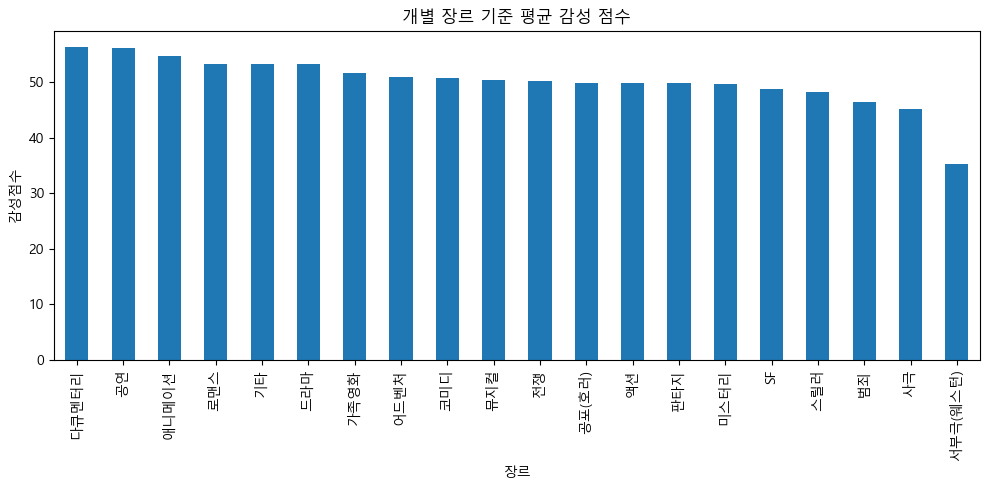

In [11]:
import matplotlib.pyplot as plt

genre_avg.plot(kind='bar', figsize=(10, 5), title="개별 장르 기준 평균 감성 점수")
plt.ylabel("감성점수")
plt.xlabel("장르")
plt.tight_layout()
plt.show()


In [12]:
search_genre = "로맨스" # 장르에 따라서 영화 검색되도록 하는 코드

filtered = df[df["장르"].str.contains(search_genre, na=False)]

# 4. 결과 보기
print(f"\n🎬 '{search_genre}' 장르가 포함된 영화 목록:")
print(filtered[["영화제목", "상영시간", "장르", "감성점수"]])


🎬 '로맨스' 장르가 포함된 영화 목록:
                                영화제목   상영시간                 장르    감성점수
73                           빈틈없는 사이  112 분           로맨스, 코미디  54.162
78                         남은 인생 10년  124 분           드라마, 로맨스  41.796
110                   가슴이 떨리는 건 너 때문  104 분                로맨스  59.232
116              만년이 지나도 변하지 않는 게 있어  127 분  로맨스, 액션, 코미디, 판타지  51.800
140            루이스 웨인: 사랑을 그린 고양이 화가  111 분           드라마, 로맨스  57.728
148            그 남자는 타이타닉을 보고 싶지 않았다   82 분           드라마, 로맨스  62.536
152                           리디밍 러브  134 분                로맨스  35.828
217                     [메가-당원영] 클래식  132 분           드라마, 로맨스  51.906
293                              우견니  110 분                로맨스  40.574
309                           가여운 것들  141 분      드라마, 로맨스, 코미디  49.476
315                            왓츠 러브  109 분      드라마, 로맨스, 코미디  28.320
335                    [아카데미] 가여운 것들  141 분      드라마, 로맨스, 코미디  46.922
411              청춘 18X2 너에게로 이어지는 길  124 분          

In [13]:
# 영화 장르에 따라 검색하는 함수 만듦

def find_movies_with_genres(df, genres):
    query = df.copy()
    for g in genres:
        query = query[query["장르"].str.contains(g, na=False)]
    return query[["영화제목", "장르", "감성점수"]]

# 예시 사용
result = find_movies_with_genres(df, ["드라마", "로맨스"])
print(result)


                                영화제목              장르    감성점수
78                         남은 인생 10년        드라마, 로맨스  41.796
140            루이스 웨인: 사랑을 그린 고양이 화가        드라마, 로맨스  57.728
148            그 남자는 타이타닉을 보고 싶지 않았다        드라마, 로맨스  62.536
217                     [메가-당원영] 클래식        드라마, 로맨스  51.906
309                           가여운 것들   드라마, 로맨스, 코미디  49.476
315                            왓츠 러브   드라마, 로맨스, 코미디  28.320
335                    [아카데미] 가여운 것들   드라마, 로맨스, 코미디  46.922
411              청춘 18X2 너에게로 이어지는 길        드라마, 로맨스  52.570
419                        차이콥스키의 아내        드라마, 로맨스  55.660
429                             디피컬트   드라마, 로맨스, 코미디  61.090
460  [청춘에게 무제한맥] 청춘 18X2 너에게로 이어지는 길        드라마, 로맨스  55.450
528                      바람과 함께 사라지다    드라마, 로맨스, 전쟁  60.768
564                          파리, 13구        드라마, 로맨스  44.622
578                           헤어질 결심  드라마, 로맨스, 미스터리  56.174


In [18]:
# 영화 제목에 따라 검색하는 함수 만듦

def find_movies_with_title(df, title):
    query = df.copy()
    query = query[query["영화제목"].str.contains(title, na=False)]
    return query[["영화제목", "장르", "감성점수"]]

# 예시 사용
result = find_movies_with_title(df, "명탐정")
print(result)

                       영화제목     장르    감성점수
174         명탐정 코난: 할로윈의 신부  애니메이션  56.550
196  [유료시사] 명탐정 코난: 할로윈의 신부  애니메이션  76.158
213   명탐정 코난: 100만 달러의 펜타그램  애니메이션  57.726
614         명탐정 코난: 14번째 표적  애니메이션  62.854


In [19]:
# 각 영화 별 등급에 따라 영화 검색하는 함수 만듦
def find_movies_with_rating(df, rating):
    query = df.copy()
    query = query[query["등급"].str.contains(rating, na=False)]
    return query[["영화제목", "장르", "감성점수"]]

# 예시 사용
result = find_movies_with_rating(df, "15세이상관람가")
print(result)


            영화제목         장르    감성점수
1      찬란한 나의 복수        드라마  51.228
2        사랑의 고고학        드라마  42.880
3         불멸의 여자        드라마  48.552
6             부운        드라마  61.020
11            피기        스릴러  40.526
..           ...        ...     ...
680     룸 넥스트 도어        드라마  57.178
681          공작새        드라마  40.132
685        파이어버드         전쟁  48.948
686  놈이 우리 안에 있다  미스터리, 스릴러  41.132
687       블랙 사이트         액션  46.628

[231 rows x 3 columns]


In [21]:
#감성점수를 기준으로 영화 검색하는 함수 만듦
def find_movies_with_sentiment(df, min_score, max_score):
    query = df.copy()
    query = query[(df["감성점수"] >= min_score) & (df["감성점수"] <= max_score)]
    return query[["영화제목", "장르", "감성점수"]]

# 예시 사용
result = find_movies_with_sentiment(df, 75, 100)
print(result)


                           영화제목         장르    감성점수
27       [클소토크] 마리아 칼라스: 세기의 디바      다큐멘터리  77.918
60                    줄리아의 인생극장        드라마  77.916
85                  자우림, 더 원더랜드      다큐멘터리  75.884
134                       축복의 집        드라마  78.848
196      [유료시사] 명탐정 코난: 할로윈의 신부      애니메이션  76.158
205                감독판 김일성의 아이들      다큐멘터리  76.928
234                괴수 8호: 미션 리컨      애니메이션  76.554
238  카우보이 비밥-천국의문 [토치 레이디 PICK]  애니메이션, 액션  78.728
248                    달팽이의 회고록      애니메이션  78.488
284                       도그데이즈        드라마  75.376
439                     찬란한 내일로        드라마  79.574
447                       이소룡-들      다큐멘터리  87.992
543           극장판 귀멸의 칼날: 무한열차편      애니메이션  89.348
563              김재화 배우전 - 단편모음         기타  75.268
584                      해변의 폴린        드라마  81.510
601      고양이키스 : 당신에게 마음을 여는 순간        드라마  75.112
610                      벌집의 정령        드라마  77.054
665                    결혼, 하겠나?        코미디  75.412


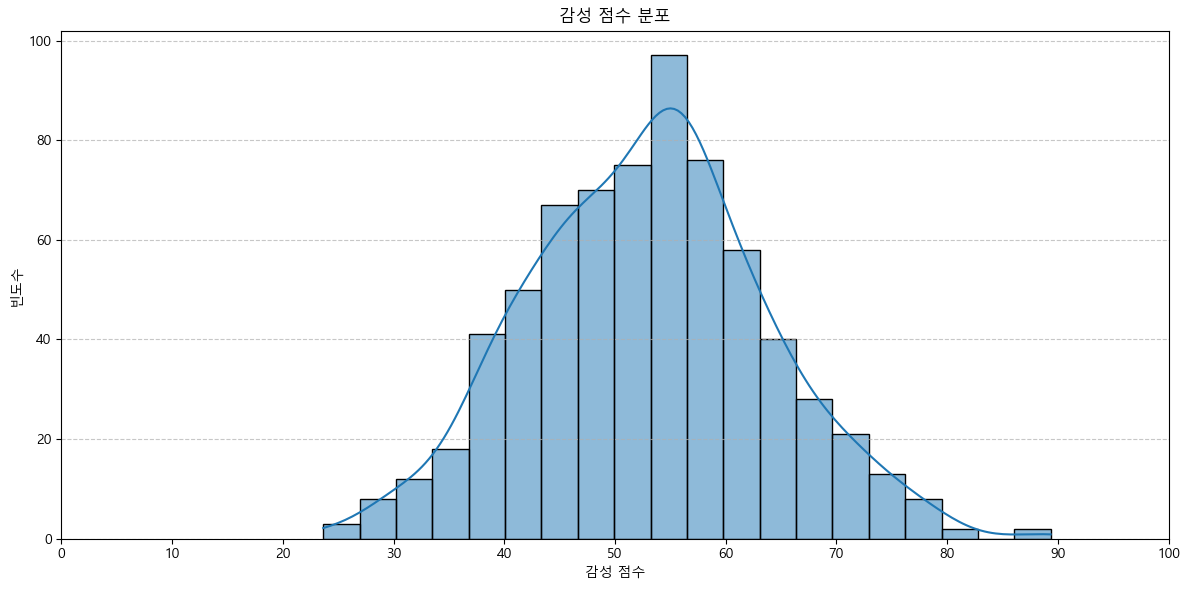

In [22]:
#감성 점수 분포 확인 시각적으로
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

#한글폰트설정해놓음

plt.figure(figsize=(12, 6))
sns.histplot(df["감성점수"], bins=20, kde=True)
plt.title("감성 점수 분포")
plt.xlabel("감성 점수")
plt.ylabel("빈도수")
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
# 장르 종류
df["장르"].unique()
# 장르별 영화 개수
genre_counts = df["장르"].str.split(",").explode().value_counts()
print(genre_counts)

장르
드라마         275
애니메이션       111
다큐멘터리        63
 코미디         51
공연           47
 액션          45
액션           41
공포(호러)       36
 스릴러         32
SF           27
 어드벤처        25
스릴러          24
 판타지         21
 미스터리        20
 범죄          18
 로맨스         15
 드라마         14
범죄           13
미스터리         13
코미디          11
로맨스           9
 뮤지컬          9
 전쟁           8
기타            7
 애니메이션        7
뮤지컬           6
 공포(호러)       3
판타지           2
 사극           1
 기타           1
 가족영화         1
어드벤처          1
가족영화          1
서부극(웨스턴)      1
전쟁            1
Name: count, dtype: int64


In [24]:
# 장르 리스트
genres = [
    "드라마", "애니메이션", "다큐멘터리", "공포(호러)", "코미디", "액션",
    "미스터리", "스릴러", "공연", "SF", "어드벤처", "로맨스", "전쟁",
    "뮤지컬", "범죄", "판타지", "가족영화", "기타", "서부극(웨스턴)"
]

def parse_input_to_condition(user_input: str) -> dict:
    condition = {}
    
    # 장르 추출
    for g in genres:
        if g in user_input:
            condition["장르"] = g
            break
    
    # 감성 점수 추출
    if "재밌는" in user_input or "좋은" in user_input:
        condition["감성점수"] = ">0.6"
        
    else:
        condition["감성점수"] = "0.4~0.6"
    # 시청 등급 조건 추출
    if "가족" in user_input:
        condition["등급"] = "전체관람가"
    elif "성인" in user_input:
        condition["등급"] = "청소년관람불가"
    
    
    return condition

In [26]:
query = "로맨스 영화인데 드라마 장르 보고 싶어"
parsed = parse_input_to_condition(query)
print(parsed)
# 결과: {'장르': '스릴러', '감성점수': '>0.7'}


{'장르': '드라마', '감성점수': '0.4~0.6'}


## 전처리 최종 파일에 대하여 영화 추천 모델 기본 단계로 제작
### 우리가 직접 필터링에 대해 지정한다면? 

In [69]:
import pandas as pd
import random

# 데이터 불러오기
df = pd.read_csv("megabox_movie_reviews_avg_merged.csv")

# 러닝타임 컬럼이 숫자형으로 되어 있는지 확인 (예: '93 분' → 숫자 추출)
df["상영시간"] = df["상영시간"].str.extract(r"(\d+)").astype(float)

def recommend_movie(genre=None, max_time=None, top_n=5, randomize=False):
    # 필터링
    filtered = df.copy()

    if genre:
        filtered = filtered[filtered["장르"].str.contains(genre, na=False)]
    if max_time:
        filtered = filtered[filtered["상영시간"] <= max_time]

    # 감성 점수로 정렬
    filtered = filtered.sort_values(by="감성점수", ascending=False)

    # 추천 목록 반환
    if randomize:
        result = filtered.head(top_n).sample(1)
    else:
        result = filtered.head(top_n)

    return result[["영화제목", "장르", "상영시간", "감성점수"]]


In [ ]:
import re
from datetime import datetime

def parse_input(user_input):
    genre_keywords = ["스릴러", "드라마", "코미디", "애니", "공포", "액션", "감동", "로맨스"]
    short_keywords = ["짧은", "킬링타임", "1시간", "80분"]
    recent_keywords = ["최근", "요즘", "2023", "2024", "2025"]
    kid_friendly = ["아이", "가족", "전체관람가"]
    adult_only = ["청불", "19금", "자극적인", "야한"]
    mood_keywords = {
        "우울": ["코미디", "감동"],
        "기분전환": ["로맨스", "코미디"],
        "슬픔": ["감동", "드라마"],
        "짜증날 때": ["액션", "공포"]
    }

    conditions = {
        "genres": [],
        "max_time": None,
        "min_year": None,
        "rating": None,
        "user_mood": None
    }
    # 장르 조합
    
    # 장르 조합 파악
    for genre in genre_keywords:
        if genre in user_input:
            conditions["genres"].append(genre)

    # 상영시간 조건
    if any(k in user_input for k in short_keywords):
        conditions["max_time"] = 80

    # 개봉일 필터링
    if any(k in user_input for k in recent_keywords):
        conditions["min_year"] = 2023

    # 관람등급
    if any(k in user_input for k in kid_friendly):
        conditions["rating"] = "전체관람가"
    elif any(k in user_input for k in adult_only):
        conditions["rating"] = "청불"

    # 감정 상태
    for mood, genres in mood_keywords.items():
        if mood in user_input:
            conditions["user_mood"] = genres
            if not conditions["genres"]:
                conditions["genres"] = genres

    return conditions


In [71]:
def recommend_movie(user_input, top_n=2, randomize=False):  # top_n 기본값을 2로 변경
    conditions = parse_input(user_input)
    filtered = df.copy()

    if conditions["genres"]:
        for g in conditions["genres"]:
            filtered = filtered[filtered["장르"].str.contains(g, na=False)]
    if conditions["max_time"]:
        filtered = filtered[filtered["상영시간"] <= conditions["max_time"]]
    if conditions["min_year"]:
        filtered = filtered[filtered["개봉일"].str.extract(r"(\d{4})").astype(float)[0] >= conditions["min_year"]]
    if conditions["rating"]:
        filtered = filtered[filtered["등급"].str.contains(conditions["rating"], na=False)]

    filtered = filtered.sort_values(by="감성점수", ascending=False)

    if filtered.empty:
        return "⚠️ 조건에 맞는 영화가 없습니다!"

    return filtered.head(top_n) if not randomize else filtered.head(top_n).sample(1)


In [1]:
user_input = input("원하시는 영화의 조건을 입력하세요: ")
print(recommend_movie(user_input))


NameError: name 'recommend_movie' is not defined